In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
# Load the HR data 

HeartDisease = pd.read_csv(r"D:\00 DataScience\01-Internship\Datasets\HeartDisease.csv", header=0)

# Copy to back-up file

HeartDisease_bk = HeartDisease.copy()

# Display first 5 records

HeartDisease.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
# Display the dataset information

HeartDisease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
# Identify the null values, if any

HeartDisease.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [6]:
# Display the unique values by variable wise

for i in HeartDisease.columns:
    print(HeartDisease[i].value_counts())

No     292422
Yes     27373
Name: HeartDisease, dtype: int64
26.63    3762
27.46    2767
27.44    2723
24.41    2696
27.12    2525
         ... 
59.85       1
50.59       1
92.53       1
62.95       1
46.56       1
Name: BMI, Length: 3604, dtype: int64
No     187887
Yes    131908
Name: Smoking, dtype: int64
No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64
No     307726
Yes     12069
Name: Stroke, dtype: int64
0.0     226589
30.0     19509
2.0      14880
1.0      10489
3.0       8617
5.0       7606
10.0      5453
15.0      5012
7.0       4629
4.0       4468
20.0      3216
14.0      2893
6.0       1270
25.0      1164
8.0        924
21.0       626
12.0       605
28.0       446
29.0       204
9.0        180
18.0       167
16.0       135
27.0       124
17.0       110
13.0        91
22.0        89
11.0        85
24.0        67
26.0        66
23.0        46
19.0        35
Name: PhysicalHealth, dtype: int64
0.0     205401
30.0     17373
2.0      16495
5.0      14149
10.0     105

In [7]:
# Use LabelEncoder for target variables 

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

HeartDisease['HeartDisease'] = LE.fit_transform(HeartDisease['HeartDisease'])

In [8]:
HeartDisease['HeartDisease'].value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [9]:
# Count the target or dependent variable by '0' & '1' and their proportion 
# (>= 10 : 1, then the dataset is imbalance data)

HeartDisease_count = HeartDisease.HeartDisease.value_counts()
print('Class 0:', HeartDisease_count[0])
print('Class 1:', HeartDisease_count[1])
print('Proportion:', round(HeartDisease_count[0] / HeartDisease_count[1], 2), ': 1')
print('Total Number of Records:', len(HeartDisease))

Class 0: 292422
Class 1: 27373
Proportion: 10.68 : 1
Total Number of Records: 319795


In [10]:
# Use LabelBinarizer to handle categorical data

from sklearn.preprocessing import LabelBinarizer

LB = LabelBinarizer()

HeartDisease['Smoking'] = LB.fit_transform(HeartDisease['Smoking'])
HeartDisease['AlcoholDrinking'] = LB.fit_transform(HeartDisease['AlcoholDrinking'])
HeartDisease['Stroke'] = LB.fit_transform(HeartDisease['Stroke'])
HeartDisease['DiffWalking'] = LB.fit_transform(HeartDisease['DiffWalking'])
HeartDisease['Sex'] = LB.fit_transform(HeartDisease['Sex'])
HeartDisease['PhysicalActivity'] = LB.fit_transform(HeartDisease['PhysicalActivity'])
HeartDisease['Asthma'] = LB.fit_transform(HeartDisease['Asthma'])
HeartDisease['KidneyDisease'] = LB.fit_transform(HeartDisease['KidneyDisease'])
HeartDisease['SkinCancer'] = LB.fit_transform(HeartDisease['SkinCancer'])

In [11]:
# Display the 'Race' count by state

HeartDisease['Race'].value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [12]:
# Replace variable 'Race' & convert values to integer.

HeartDisease['Race'] = HeartDisease['Race'].str.replace('American Indian/Alaskan Native', '0')
HeartDisease['Race'] = HeartDisease['Race'].str.replace('Asian', '1')
HeartDisease['Race'] = HeartDisease['Race'].str.replace('Other', '4')
HeartDisease['Race'] = HeartDisease['Race'].str.replace('Black', '2')
HeartDisease['Race'] = HeartDisease['Race'].str.replace('Hispanic', '3')
HeartDisease['Race'] = HeartDisease['Race'].str.replace('White', '4')
HeartDisease['Race'] = HeartDisease['Race'].astype(int)

In [13]:
# Display the 'AgeCategory' count by state

HeartDisease['AgeCategory'].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [14]:
# Replace variable 'AgeCategory' & convert values to integer.

HeartDisease['AgeCategory'] = HeartDisease['AgeCategory'].astype(str).str.replace('18-24', '0')
HeartDisease['AgeCategory'] = HeartDisease['AgeCategory'].astype(str).str.replace('25-29', '1')
HeartDisease['AgeCategory'] = HeartDisease['AgeCategory'].astype(str).str.replace('30-34', '2')
HeartDisease['AgeCategory'] = HeartDisease['AgeCategory'].astype(str).str.replace('35-39', '3')
HeartDisease['AgeCategory'] = HeartDisease['AgeCategory'].astype(str).str.replace('40-44', '4')
HeartDisease['AgeCategory'] = HeartDisease['AgeCategory'].astype(str).str.replace('45-49', '5')
HeartDisease['AgeCategory'] = HeartDisease['AgeCategory'].astype(str).str.replace('50-54', '6')
HeartDisease['AgeCategory'] = HeartDisease['AgeCategory'].astype(str).str.replace('55-59', '7')
HeartDisease['AgeCategory'] = HeartDisease['AgeCategory'].astype(str).str.replace('60-64', '8')
HeartDisease['AgeCategory'] = HeartDisease['AgeCategory'].astype(str).str.replace('65-69', '9')
HeartDisease['AgeCategory'] = HeartDisease['AgeCategory'].astype(str).str.replace('70-74', '10')
HeartDisease['AgeCategory'] = HeartDisease['AgeCategory'].astype(str).str.replace('75-79', '11')
HeartDisease['AgeCategory'] = HeartDisease['AgeCategory'].astype(str).str.replace('80 or older', '12')
HeartDisease['AgeCategory'] = HeartDisease['AgeCategory'].astype(int)

In [15]:
HeartDisease.sample(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
302128,0,19.80,0,0,0,0.0,0.0,0,0,1,4,No,0,Very good,7.0,0,0,0
247367,0,32.28,1,0,0,0.0,2.0,1,0,4,3,Yes,0,Fair,5.0,0,0,0
197012,1,22.26,0,0,0,15.0,0.0,1,0,12,4,Yes,0,Good,7.0,0,1,1
149831,0,27.12,0,0,0,0.0,0.0,0,0,7,4,No,1,Very good,7.0,0,0,0
291690,0,25.83,0,0,0,5.0,0.0,0,1,8,4,No,1,Very good,8.0,0,0,0
18361,0,21.70,0,0,0,0.0,0.0,0,1,12,4,No,1,Good,8.0,0,0,1
229198,0,24.21,0,0,0,1.0,10.0,0,0,3,4,No,1,Very good,6.0,0,0,0
254627,0,25.83,0,0,0,1.0,0.0,0,0,5,4,No,1,Very good,6.0,0,0,0
44573,0,28.19,0,0,0,0.0,0.0,0,0,2,4,No,1,Good,8.0,0,0,0
146877,0,33.47,0,0,0,0.0,0.0,0,1,9,4,Yes,1,Very good,8.0,0,0,0


In [16]:
# Replace 'Diabetic' variable values 

HeartDisease['Diabetic'] = HeartDisease['Diabetic'].replace(['No, borderline diabetes'],'No_borderline_diabetes')
HeartDisease['Diabetic'] = HeartDisease['Diabetic'].replace(['Yes (during pregnancy)'],'Yes_during_pregnancy')

In [17]:
# Display the 'Diabetic' count by state

HeartDisease['Diabetic'].value_counts()

No                        269653
Yes                        40802
No_borderline_diabetes      6781
Yes_during_pregnancy        2559
Name: Diabetic, dtype: int64

In [18]:
# Replace variable 'Diabetic' & convert values to integer.

HeartDisease['Diabetic'] = HeartDisease['Diabetic'].astype(str).str.replace('No', '0')
HeartDisease['Diabetic'] = HeartDisease['Diabetic'].astype(str).str.replace('0_borderline_diabetes', '1')
HeartDisease['Diabetic'] = HeartDisease['Diabetic'].astype(str).str.replace('Yes', '2')
HeartDisease['Diabetic'] = HeartDisease['Diabetic'].astype(str).str.replace('2_during_pregnancy', '3')
HeartDisease['Diabetic'] = HeartDisease['Diabetic'].astype(int)

In [19]:
# Display the 'GenHealth' count by state

HeartDisease['GenHealth'].value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [20]:
# Replace variable 'GenHealth' & convert values to integer.

HeartDisease['GenHealth'] = HeartDisease['GenHealth'].str.replace('Excellent', '0')
HeartDisease['GenHealth'] = HeartDisease['GenHealth'].str.replace('Very good', '1')
HeartDisease['GenHealth'] = HeartDisease['GenHealth'].str.replace('Good', '2')
HeartDisease['GenHealth'] = HeartDisease['GenHealth'].str.replace('Fair', '3')
HeartDisease['GenHealth'] = HeartDisease['GenHealth'].str.replace('Poor', '4')
HeartDisease['GenHealth'] = HeartDisease['GenHealth'].astype(int)

In [21]:
# display all columns names

HeartDisease.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [22]:
# Cols 1 for scaling

Col1 = ['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'Race', 'Diabetic', 'GenHealth', 'SleepTime']

In [23]:
# Identify the independent and Target variables

IndepVar = []
for col in HeartDisease.columns:
    if col != 'HeartDisease':
        IndepVar.append(col)

TargetVar = 'HeartDisease'

x = HeartDisease[IndepVar]
y = HeartDisease[TargetVar]

In [24]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42,
                                                   stratify=HeartDisease[['AlcoholDrinking', 
                                                                          'Smoking', 
                                                                          'Stroke', 
                                                                          'Sex',
                                                                          'Asthma']])

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((223856, 17), (95939, 17), (223856,), (95939,))

In [25]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[Col1] = mmscaler.fit_transform(x_train[Col1])
x_train = pd.DataFrame(x_train)

x_test[Col1] = mmscaler.fit_transform(x_test[Col1])
x_test = pd.DataFrame(x_test)

# XGB Classifier model

Confusion matrix : 
 [[  754  7342]
 [  701 87142]]
Outcome values : 
 754 7342 701 87142
Classification report : 
               precision    recall  f1-score   support

           1       0.52      0.09      0.16      8096
           0       0.92      0.99      0.96     87843

    accuracy                           0.92     95939
   macro avg       0.72      0.54      0.56     95939
weighted avg       0.89      0.92      0.89     95939

Accuracy : 91.6 %
Precision : 51.8 %
Recall : 9.3 %
F1 Score : 0.158
Specificity or True Negative Rate : 99.2 %
Balanced Accuracy : 54.2 %
MCC : 0.194
roc_auc_score: 0.543


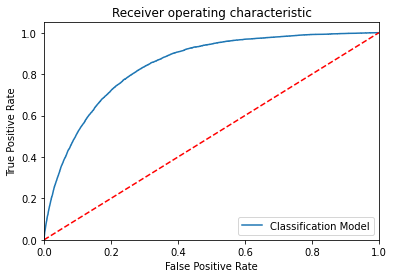

-----------------------------------------------------------------------------------------------------


In [26]:
# Training the XGB Classifier model on the Training set

from xgboost import XGBClassifier

# Build the model

modelXGB = XGBClassifier(n_estimators=100, max_depth=3, eval_metric='mlogloss')
#modelXGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1, colsample_bynode=1, 
#                         colsample_bytree=1, eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type='gain',
#                         interaction_constraints='', learning_rate=0.300000012, max_delta_step=0, max_depth=6, 
#                         min_child_weight=1, missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=16,
#                         num_parallel_tree=1, objective='multi:softprob', random_state=0, reg_alpha=0, reg_lambda=1, 
#                         scale_pos_weight=None, subsample=1, tree_method='exact', use_label_encoder=False, 
#                         validate_parameters=1, verbosity=None)

# Fit the model with train data

modelXGB.fit(x_train,y_train)

# Predict the model with test data set

y_pred = modelXGB.predict(x_test)
y_pred_prob = modelXGB.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,modelXGB.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

In [27]:
# Load the result dataset

EMResults = pd.read_csv(r"D:\00 Henotic\SRKR\Datasets\HTResults.csv", header=0)
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# Compare XGBoost with other classification models

Method:  LogisticRegression()
Confusion matrix : 
 [[  877  7219]
 [  833 87010]]
Outcome values : 
 877 7219 833 87010
Classification report : 
               precision    recall  f1-score   support

           1       0.51      0.11      0.18      8096
           0       0.92      0.99      0.96     87843

    accuracy                           0.92     95939
   macro avg       0.72      0.55      0.57     95939
weighted avg       0.89      0.92      0.89     95939

Accuracy : 91.6 %
Precision : 51.3 %
Recall : 10.8 %
F1 Score : 0.179
Balanced Accuracy : 55.0 %
MCC : 0.208
roc_auc_score: 0.549


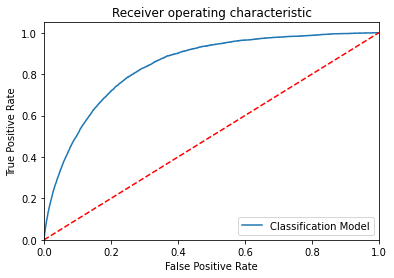

-----------------------------------------------------------------------
Method:  RandomForestClassifier(random_state=0)
Confusion matrix : 
 [[ 1023  7073]
 [ 1914 85929]]
Outcome values : 
 1023 7073 1914 85929
Classification report : 
               precision    recall  f1-score   support

           1       0.35      0.13      0.19      8096
           0       0.92      0.98      0.95     87843

    accuracy                           0.91     95939
   macro avg       0.64      0.55      0.57     95939
weighted avg       0.88      0.91      0.89     95939

Accuracy : 90.6 %
Precision : 34.8 %
Recall : 12.6 %
F1 Score : 0.185
Balanced Accuracy : 55.2 %
MCC : 0.169
roc_auc_score: 0.552


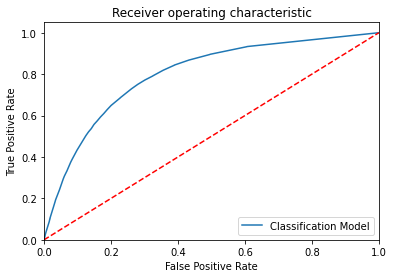

-----------------------------------------------------------------------
Method:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 1311  6785]
 [ 3168 84675]]
Outcome values : 
 1311 6785 3168 84675
Classification report : 
               precision    recall  f1-score   support

           1       0.29      0.16      0.21      8096
           0       0.93      0.96      0.94     87843

    accuracy                           0.90     95939
   macro avg       0.61      0.56      0.58     95939
weighted avg       0.87      0.90      0.88     95939

Accuracy : 89.6 %
Precision : 29.3 %
Recall : 16.2 %
F1 Score : 0.209
Balanced Accuracy : 56.3 %
MCC : 0.166
roc_auc_score: 0.563


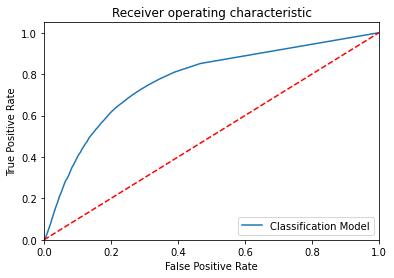

-----------------------------------------------------------------------
Method:  DecisionTreeClassifier(criterion='entropy')
Confusion matrix : 
 [[ 2075  6021]
 [ 6900 80943]]
Outcome values : 
 2075 6021 6900 80943
Classification report : 
               precision    recall  f1-score   support

           1       0.23      0.26      0.24      8096
           0       0.93      0.92      0.93     87843

    accuracy                           0.87     95939
   macro avg       0.58      0.59      0.58     95939
weighted avg       0.87      0.87      0.87     95939

Accuracy : 86.5 %
Precision : 23.1 %
Recall : 25.6 %
F1 Score : 0.243
Balanced Accuracy : 58.8 %
MCC : 0.17
roc_auc_score: 0.589


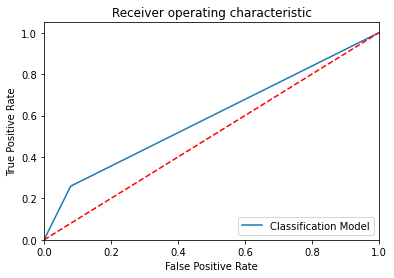

-----------------------------------------------------------------------
Method:  KNeighborsClassifier()
Confusion matrix : 
 [[ 1181  6915]
 [ 2101 85742]]
Outcome values : 
 1181 6915 2101 85742
Classification report : 
               precision    recall  f1-score   support

           1       0.36      0.15      0.21      8096
           0       0.93      0.98      0.95     87843

    accuracy                           0.91     95939
   macro avg       0.64      0.56      0.58     95939
weighted avg       0.88      0.91      0.89     95939

Accuracy : 90.6 %
Precision : 36.0 %
Recall : 14.6 %
F1 Score : 0.208
Balanced Accuracy : 56.1 %
MCC : 0.187
roc_auc_score: 0.561


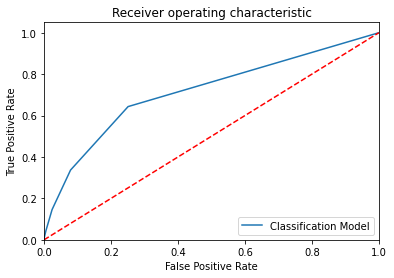

-----------------------------------------------------------------------
Method:  XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              eval_metric='mlogloss', gamma=None, gpu_id=None,
              importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=3,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)
Confusion matrix : 
 [[  754  7342]
 [  701 87142]]
Outcome values : 
 754 7342 701 87142
Classification report : 
               precision    recall  f1-score   support

           1       0.52      0.09      0.16      8096
           0       0.92    

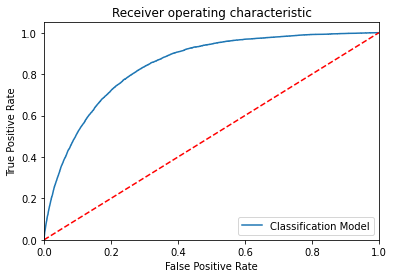

-----------------------------------------------------------------------


In [28]:
# Checking accuracy by changing base estimator - 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier

# Build the model

modelLR = LogisticRegression()
modelRF = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=0)
modelET = ExtraTreesClassifier()
modelDT = DecisionTreeClassifier(criterion="entropy")
modelKNN = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30,
                                p=2, metric='minkowski', metric_params=None, n_jobs=None)

modelXGB = XGBClassifier(n_estimators=100, max_depth=3, eval_metric='mlogloss')

MM = [modelLR, modelRF, modelET, modelDT, modelKNN, modelXGB]
for Models in MM:
    print("Method: ", Models)
        
    # fit the model with train data
    
    Models.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = Models.predict(x_test)
    y_pred_prob = Models.predict_proba(x_test)
    
    # Evaluate the model performance by metrics
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    matrix = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n',matrix)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3)
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve

    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual,Models.predict_proba(x_test)[:,1])
    plt.figure()
    
    # plt.plot
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    
    print('-----------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------
    new_row = {'Model Name' : Models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #-------------------------------------------------------------------------------------

In [30]:
# Load the result dataset

#EMResults.to_csv("D://00 Henotic//SRKR//Datasets//Results//EMResults_22.csv")

EMResults.head(10)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),877,7219,833,87010,0.916,0.513,0.108,0.179,0.991,0.208,0.549421,0.550
1,"(DecisionTreeClassifier(max_features='auto', r...",1023,7073,1914,85929,0.906,0.348,0.126,0.185,0.978,0.169,0.552285,0.552
2,"(ExtraTreeClassifier(random_state=1142177718),...",1311,6785,3168,84675,0.896,0.293,0.162,0.209,0.964,0.166,0.562934,0.563
3,DecisionTreeClassifier(criterion='entropy'),2075,6021,6900,80943,0.865,0.231,0.256,0.243,0.921,0.170,0.588875,0.588
4,KNeighborsClassifier(),1181,6915,2101,85742,0.906,0.360,0.146,0.208,0.976,0.187,0.560978,0.561
5,"XGBClassifier(base_score=0.5, booster='gbtree'...",754,7342,701,87142,0.916,0.518,0.093,0.158,0.992,0.194,0.542576,0.542
